# Read in the data.

## data:
You can download the data here: https://www.kaggle.com/c/titanic/data
and locate the filepath where you downloaded the data.

In [6]:
import pandas as pd # pandas is a package and is helpful for data manipulation

In [7]:
filepath_train = "./titanic/train.csv";
filepath_test = "./titanic/test.csv";
filepath_gender = "./titanic/gender_submission.csv";
train = pd.read_csv(filepath_train)
test = pd.read_csv(filepath_test)
gender = pd.read_csv(filepath_gender)

Congratulations! You have read your data into dataframes. This is sometimes the hardest part!

# Exploratory Data Analysis
## Motivation
* Important first steps in any data science project
* Basic description of the data, visualize it, identify patterns in it, identify challenges of using the data
* Allows us to determine whether data needs to be manipulated prior to analysis
* Allows us to determine if assumptions of our subsequent models are satisfied
* Can be done as an end goal, or as part of a complex analysis

## Workflow
* read in data
* look at the first few rows, last few rows, check data structure
* summary statistics
* look at one variable at a time (histograms, proportion tables)
* look at two variables at a time (scatterplots, bar charts, etc)

## Example with Titanic data
---
source: https://www.kaggle.com/c/titanic/data
end goal: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Variables:
* Survival 	Survival 	0 = No, 1 = Yes
* Pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
* Sex 	Sex 	
* Age 	Age in years 	
* Sibsp 	# of siblings / spouses aboard the Titanic 	
* Parch 	# of parents / children aboard the Titanic 	
* Ticket 	Ticket number 	
* Fare 	Passenger fare 	
* Cabin 	Cabin number 	
* Embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

Notes:
* pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
        

## look at the first few rows, last few rows, check data structure

In [8]:
# look at column of the "train" data
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# look at the first lines of the "train" data
# dataframe.head()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#last few rows of train data
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
# structure of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# dimensions of train
train.shape

(891, 12)

## Summary Statistics
* Dataframe.describe() 
    * (include = 'data type')
* Dataframe.isna() for missing data
* Dataframe.unique() for possible values that the variable can take on

In [13]:
train.describe() #summary statistics for numerical data (floats and integers)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train.describe(include='object') # describe non-numeric features

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vovk, Mr. Janko",male,1601,G6,S
freq,1,577,7,4,644


In [15]:
train.isna().sum() # finding null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train.Survived.unique()

array([0, 1])

In [17]:
train.Sex.unique() # unique entries for the categorical data

array(['male', 'female'], dtype=object)

this is what we can observe:
* we have 891 entries (observations)
* we have 12 columns
* some are float (any real-number value), int64 (integers, no decimals), and object(non-numeric)
* we identify that there is missing data (NaN), so we may need to revisit how we handle the missing data later on.
* Survived variable and Sex variable are binary (can take on two different 'values')
* in statistics, we may call a float a 'continuous variable', and int64 'binary' if they only take on two values or 'categorical' if they take on more than 2 values. 
* objects can be word representations of binary or categorical variables.

## Deeper dive into each of our features

In [18]:
import numpy as np
import matplotlib.pyplot as plt

**Histograms**: good for visualizing distributions of numerical variables (integers and floats)
* using dataframe.hist() we can plot the histograms for the numerical variables in our dataframe
* there are many plotting options available: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
* figsize=(width, height)
* layout=(rows, columns) for the subplots
* plt.tight_layout is a nice option. In this case, titles and x-axes overlap without it.
* we can ignore PassengerId 
* there are more who died (Survived = 0) than survived (Survived = 1)
* most fares were pretty cheap
* Pclass can take on values of 1 (high), 2, or 3 (low), representative of socioeconomic status. There were many more passengers of lower socioeconomic class.

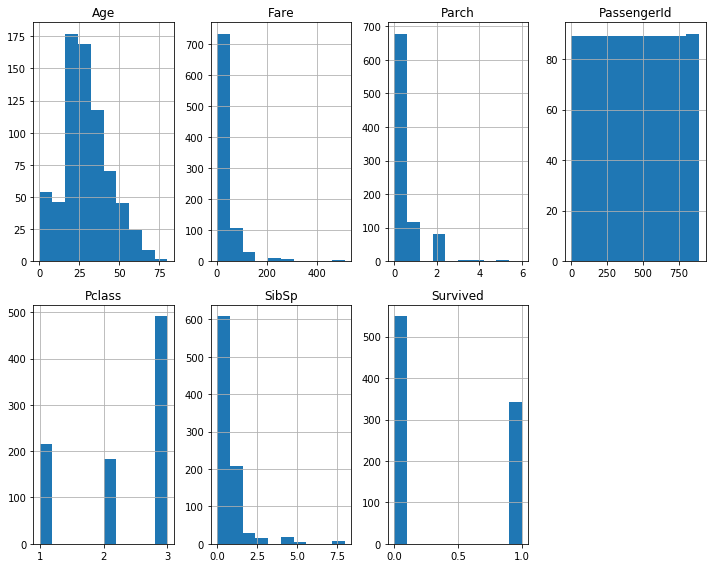

In [21]:
train.hist(figsize=(10,8), layout=(2,4));
plt.tight_layout() 

Text(0.5, 0, 'Pclass')

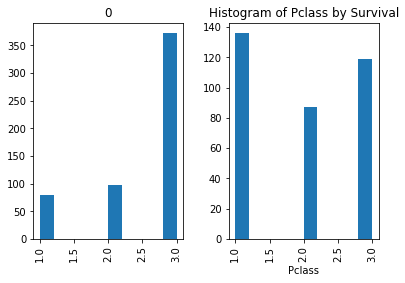

In [20]:
train.hist(column='Pclass', by=train.Survived, sharex=True, label=True)
plt.title('Histogram of Pclass by Survival')
plt.xlabel('Pclass')

Notice how the label and title are only plotted on one of the figures. We can get around this with the following code:

Text(0.5, 0.04, 'Pclass')

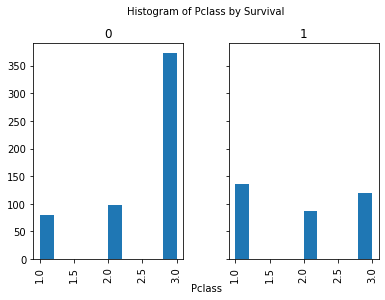

In [0]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

train.hist(column='Pclass', by=train.Survived, ax=axes)

fig.text(0.5, 1, 'Histogram of Pclass by Survival', ha='center')
fig.text(0.5, 0.04, 'Pclass', ha='center')

**Box Plots** are also useful for displaying distributions and side-by-side comparisons of data.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot

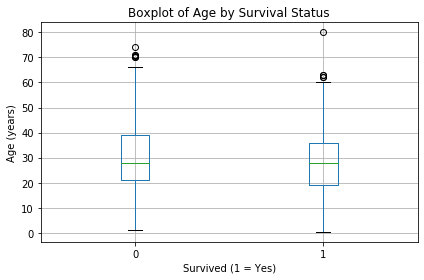

In [30]:
train.boxplot(column='Age', by='Survived')
plt.suptitle('') # removed default subtitle, it overlaps with title
plt.title('Boxplot of Age by Survival Status')
plt.xlabel('Survived (1 = Yes)')
plt.ylabel('Age (years)')
plt.tight_layout()

Based on the plot above, we do not see much differences in age comparing those who survived compared to those who didn't.

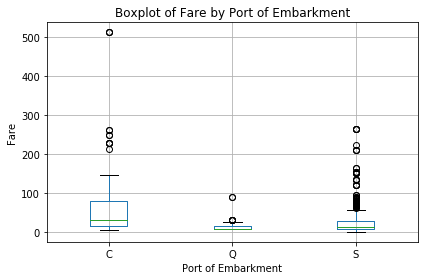

In [0]:
train.boxplot(column='Fare', by='Embarked')
plt.suptitle('') # removed default subtitle, it overlaps with title
plt.title('Boxplot of Fare by Port of Embarkment')
plt.xlabel('Port of Embarkment')
plt.ylabel('Fare')
plt.tight_layout()

Based on the plot above, those who left from 'C' had paid a higher fare on average compared to those who left from 'Q'

**Scatterplots**: useful for comparing two continuous variables to assess for potential trends
* one way of accomplishing this is by using Dataframe.plot(kind='scatter', x='x variable', y='y variable')
* https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

Text(0.5, 1.0, 'Scatterplot of Fare vs Age')

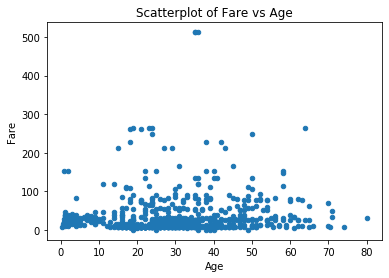

In [0]:
train.plot(kind='scatter', x='Age', y='Fare')
plt.title('Scatterplot of Fare vs Age')

I see a vague upside-down 'U'-pattern

Dataframe.corr() returns correlation between variables. This looks for a *linear* relationship between continuous variables. Correlation = 0 if the two variables are independent.

In [0]:
train[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


**Bar plots**: useful to display continuous data comparing different categories
* may need to manipulate the data first
* Dataframe.plot.bar(x= , y= )

In [0]:
trainbar = train.groupby('Survived').mean()

Text(0.5, 0, 'Survival Status (1 = Survived)')

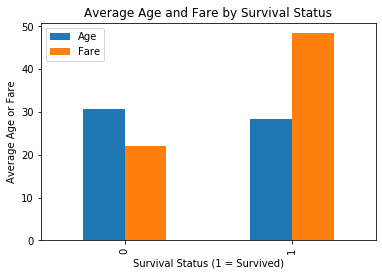

In [0]:
trainbar.plot.bar(y=['Age','Fare'])
plt.title('Average Age and Fare by Survival Status')
plt.ylabel('Average Age or Fare')
plt.xlabel('Survival Status (1 = Survived)')

In [0]:
train.groupby(['Survived', 'Pclass', 'Sex', 'Embarked']).count().head()

PassengerId  Name  Age  SibSp  Parch  Ticket  \
Survived Pclass Sex    Embarked                                                 
0        1      female C                   1     1    1      1      1       1   
                       S                   2     2    2      2      2       2   
                male   C                  25    25   20     25     25      25   
                       Q                   1     1    1      1      1       1   
                       S                  51    51   40     51     51      51   

                                 Fare  Cabin  
Survived Pclass Sex    Embarked               
0        1      female C            1      1  
                       S            2      2  
                male   C           25     15  
                       Q            1      1  
                       S           51     40

Sometimes, we want to look at the relationship between two categorical variables.
Options for looking at two categorical variables
* **Cross table** pd.crosstab()
* **Bar plots** of the counts of the one categorical variable, by the other categorical variable (similar to histogram)
* **Chi-squared test** for independence


In [0]:
trainSurvivedPclass = pd.crosstab(train.Survived, train.Pclass)
print(trainSurvivedPclass)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [0]:
trainSurvivedPclass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
1    2 non-null int64
2    2 non-null int64
3    2 non-null int64
dtypes: int64(3)
memory usage: 64.0 bytes


Text(0, 0.5, 'Counts in each Pclass')

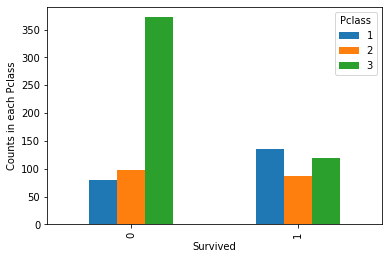

In [0]:
trainSurvivedPclass.plot.bar()
plt.ylabel('Counts in each Pclass')

In [0]:
Pclassratio = train['Survived'].value_counts('Survived')
print(Pclassratio)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


In [0]:
from scipy import stats
chi= stats.chi2_contingency(trainSurvivedPclass)
print(chi)

(102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))


The first value of the output is the Chi-squared value, followed by the p-value (p < 0.05), followed by the expected frequencies. The null hypothesis (no association between Survived and Pclass) is rejected.  